In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
churnDF = pd.read_csv("../input/telecoData.csv")
churnDF.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
# Summary
churnDF.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [4]:
#statistics
churnDF.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [5]:
# create column 
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churnDF.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churnDF.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Handling missing values

In [6]:
# missing value ratio 
churnDF.isnull().sum()*100/churnDF.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### impute missing values

#### i) Imputing with zeroes

In [7]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churnDF[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [8]:
churnDF.loc[churnDF.total_rech_data_6.isnull() & churnDF.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [9]:
# impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [10]:
# impute missing values with 0
churnDF[zero_impute] = churnDF[zero_impute].apply(lambda x: x.fillna(0))

In [11]:
# confirmation
print("Missing value ratio:\n")
print(churnDF[zero_impute].isnull().sum()*100/churnDF.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churnDF[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [12]:
# drop id and date
print("Shape before dropping: ", churnDF.shape)
churnDF = churnDF.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churnDF.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


### ii) Replace NaN values in categorical variables

In [13]:
# replace missing values with '-1' in categorical columns
churnDF[cat_cols] = churnDF[cat_cols].apply(lambda x: x.fillna(-1))

In [14]:
# missing value ratio
print("Missing value ratio:\n")
print(churnDF[cat_cols].isnull().sum()*100/churnDF.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### iii) Drop variables with more than a given threshold of missing values

In [15]:
initial_cols = churnDF.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churnDF.apply(lambda column: True if column.isnull().sum()/churnDF.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churnDF.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [16]:
# drop columns
churnDF = churnDF.loc[:, include_cols]

dropped_cols = churnDF.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


### iv) imputing using MICE

### calculate total data recharge amount

In [17]:
# June and July --> number of recharges * average recharge amount
churnDF['total_data_rech_6'] = churnDF.total_rech_data_6 * churnDF.av_rech_amt_data_6
churnDF['total_data_rech_7'] = churnDF.total_rech_data_7 * churnDF.av_rech_amt_data_7

In [18]:
# June and July --> call recharge amount + data recharge amount
churnDF['amt_data_6'] = churnDF.total_rech_amt_6 + churnDF.total_data_rech_6
churnDF['amt_data_7'] = churnDF.total_rech_amt_7 + churnDF.total_data_rech_7

In [19]:
# average recharge done by customer in June and July
churnDF['av_amt_data_6_7'] = (churnDF.amt_data_6 + churnDF.amt_data_7)/2

In [20]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churnDF.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [21]:
# Only recharged their mobiles with more than or equal to 70th percentile amount
churnDF_filtered = churnDF.loc[churnDF.av_amt_data_6_7 >= churnDF.av_amt_data_6_7.quantile(0.7), :]
churnDF_filtered = churnDF_filtered.reset_index(drop=True)
churnDF_filtered.shape

(30001, 201)

In [22]:
# delete un-necessary variables
churnDF_filtered = churnDF_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churnDF_filtered.shape

(30001, 196)

### derive churnDF

In [23]:
# calculate total incoming and outgoing minutes of usage
churnDF_filtered['total_calls_mou_9'] = churnDF_filtered.total_ic_mou_9 + churnDF_filtered.total_og_mou_9

In [24]:
# calculate 2g and 3g data consumption
churnDF_filtered['total_internet_mb_9'] =  churnDF_filtered.vol_2g_mb_9 + churnDF_filtered.vol_3g_mb_9

In [25]:
# create churnDF variable: those who have not used either calls or internet in the month of September are customers who have churnDFed

# 0 - not churnDF, 1 - churnDF
churnDF_filtered['churnDF'] = churnDF_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [26]:
# delete derived variables
churnDF_filtered = churnDF_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [27]:
# change data type to category
churnDF_filtered.churnDF = churnDF_filtered.churnDF.astype("category")

# print churnDF ratio
print("churnDF Ratio:")
print(churnDF_filtered.churnDF.value_counts()*100/churnDF_filtered.shape[0])

churnDF Ratio:
0    91.863605
1     8.136395
Name: churnDF, dtype: float64


# Calculate difference between 8th and previous months

In [28]:
churnDF_filtered['arpu_diff'] = churnDF_filtered.arpu_8 - ((churnDF_filtered.arpu_6 + churnDF_filtered.arpu_7)/2)

churnDF_filtered['onnet_mou_diff'] = churnDF_filtered.onnet_mou_8 - ((churnDF_filtered.onnet_mou_6 + churnDF_filtered.onnet_mou_7)/2)

churnDF_filtered['offnet_mou_diff'] = churnDF_filtered.offnet_mou_8 - ((churnDF_filtered.offnet_mou_6 + churnDF_filtered.offnet_mou_7)/2)

churnDF_filtered['roam_ic_mou_diff'] = churnDF_filtered.roam_ic_mou_8 - ((churnDF_filtered.roam_ic_mou_6 + churnDF_filtered.roam_ic_mou_7)/2)

churnDF_filtered['roam_og_mou_diff'] = churnDF_filtered.roam_og_mou_8 - ((churnDF_filtered.roam_og_mou_6 + churnDF_filtered.roam_og_mou_7)/2)

churnDF_filtered['loc_og_mou_diff'] = churnDF_filtered.loc_og_mou_8 - ((churnDF_filtered.loc_og_mou_6 + churnDF_filtered.loc_og_mou_7)/2)

churnDF_filtered['std_og_mou_diff'] = churnDF_filtered.std_og_mou_8 - ((churnDF_filtered.std_og_mou_6 + churnDF_filtered.std_og_mou_7)/2)

churnDF_filtered['isd_og_mou_diff'] = churnDF_filtered.isd_og_mou_8 - ((churnDF_filtered.isd_og_mou_6 + churnDF_filtered.isd_og_mou_7)/2)

churnDF_filtered['spl_og_mou_diff'] = churnDF_filtered.spl_og_mou_8 - ((churnDF_filtered.spl_og_mou_6 + churnDF_filtered.spl_og_mou_7)/2)

churnDF_filtered['total_og_mou_diff'] = churnDF_filtered.total_og_mou_8 - ((churnDF_filtered.total_og_mou_6 + churnDF_filtered.total_og_mou_7)/2)

churnDF_filtered['loc_ic_mou_diff'] = churnDF_filtered.loc_ic_mou_8 - ((churnDF_filtered.loc_ic_mou_6 + churnDF_filtered.loc_ic_mou_7)/2)

churnDF_filtered['std_ic_mou_diff'] = churnDF_filtered.std_ic_mou_8 - ((churnDF_filtered.std_ic_mou_6 + churnDF_filtered.std_ic_mou_7)/2)

churnDF_filtered['isd_ic_mou_diff'] = churnDF_filtered.isd_ic_mou_8 - ((churnDF_filtered.isd_ic_mou_6 + churnDF_filtered.isd_ic_mou_7)/2)

churnDF_filtered['spl_ic_mou_diff'] = churnDF_filtered.spl_ic_mou_8 - ((churnDF_filtered.spl_ic_mou_6 + churnDF_filtered.spl_ic_mou_7)/2)

churnDF_filtered['total_ic_mou_diff'] = churnDF_filtered.total_ic_mou_8 - ((churnDF_filtered.total_ic_mou_6 + churnDF_filtered.total_ic_mou_7)/2)

churnDF_filtered['total_rech_num_diff'] = churnDF_filtered.total_rech_num_8 - ((churnDF_filtered.total_rech_num_6 + churnDF_filtered.total_rech_num_7)/2)

churnDF_filtered['total_rech_amt_diff'] = churnDF_filtered.total_rech_amt_8 - ((churnDF_filtered.total_rech_amt_6 + churnDF_filtered.total_rech_amt_7)/2)

churnDF_filtered['max_rech_amt_diff'] = churnDF_filtered.max_rech_amt_8 - ((churnDF_filtered.max_rech_amt_6 + churnDF_filtered.max_rech_amt_7)/2)

churnDF_filtered['total_rech_data_diff'] = churnDF_filtered.total_rech_data_8 - ((churnDF_filtered.total_rech_data_6 + churnDF_filtered.total_rech_data_7)/2)

churnDF_filtered['max_rech_data_diff'] = churnDF_filtered.max_rech_data_8 - ((churnDF_filtered.max_rech_data_6 + churnDF_filtered.max_rech_data_7)/2)

churnDF_filtered['av_rech_amt_data_diff'] = churnDF_filtered.av_rech_amt_data_8 - ((churnDF_filtered.av_rech_amt_data_6 + churnDF_filtered.av_rech_amt_data_7)/2)

churnDF_filtered['vol_2g_mb_diff'] = churnDF_filtered.vol_2g_mb_8 - ((churnDF_filtered.vol_2g_mb_6 + churnDF_filtered.vol_2g_mb_7)/2)

churnDF_filtered['vol_3g_mb_diff'] = churnDF_filtered.vol_3g_mb_8 - ((churnDF_filtered.vol_3g_mb_6 + churnDF_filtered.vol_3g_mb_7)/2)

In [29]:
# difference variables
churnDF_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

### delete columns that belong to the churnDF month (9th month)

In [30]:
# delete all variables relating to 9th month
churnDF_filtered = churnDF_filtered.filter(regex='[^9]$', axis=1)
churnDF_filtered.shape

(30001, 173)

In [31]:
# extract all names that end with 9
col_9_names = churnDF.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churnDF')
num_cols = [col for col in churnDF_filtered.columns if col not in cat_cols]

## visualise data

In [32]:
# change columns types
churnDF_filtered[num_cols] = churnDF_filtered[num_cols].apply(pd.to_numeric)
churnDF_filtered[cat_cols] = churnDF_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [33]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

## Univariate EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


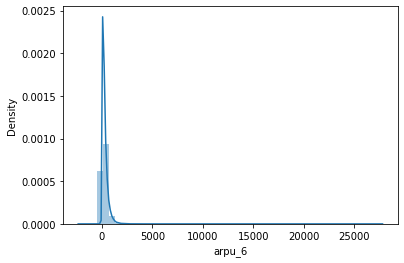

In [34]:
univariate(churnDF.arpu_6)

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


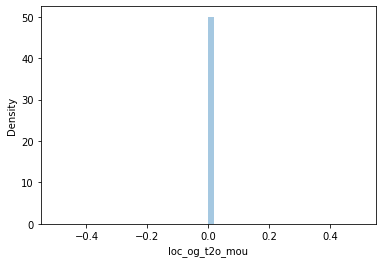

In [35]:
univariate(churnDF.loc_og_t2o_mou)

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


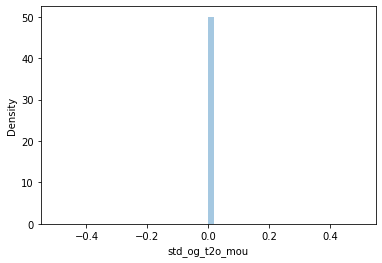

In [36]:
univariate(churnDF.std_og_t2o_mou)

count    94621.000000
mean       133.018098
std        308.951589
min          0.000000
25%          6.460000
50%         32.360000
75%        115.860000
max      10752.560000
Name: onnet_mou_8, dtype: float64


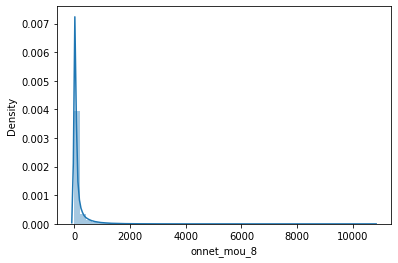

In [37]:
univariate(churnDF.onnet_mou_8)

count    92254.000000
mean       190.337222
std        319.396092
min          0.000000
25%         27.130000
50%         87.290000
75%        220.505000
max      10310.760000
Name: offnet_mou_9, dtype: float64


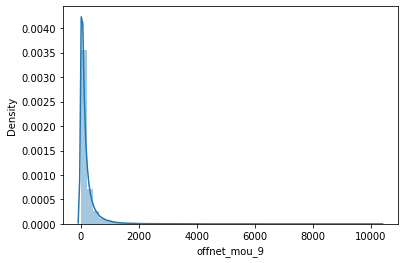

In [38]:
univariate(churnDF.offnet_mou_9)

Variables are very **skewed** towards the left.

## Bivariate EDA

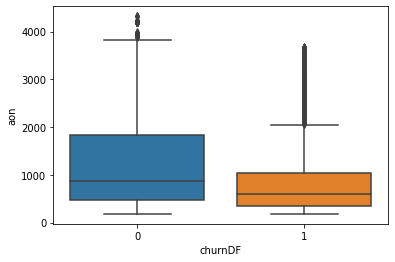

In [39]:
bivariate(churnDF_filtered.churnDF, churnDF_filtered.aon)

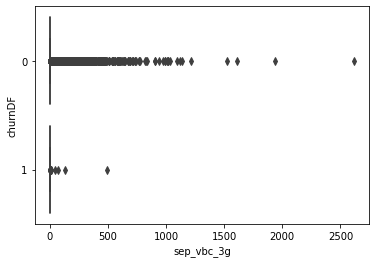

In [40]:
bivariate(churnDF_filtered.sep_vbc_3g, churnDF_filtered.churnDF)

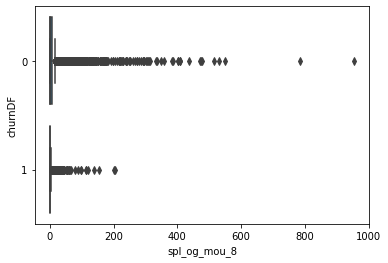

In [41]:
bivariate(churnDF_filtered.spl_og_mou_8, churnDF_filtered.churnDF)

In [42]:
pd.crosstab(churnDF_filtered.churnDF, churnDF_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churnDF,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [43]:
pd.crosstab(churnDF_filtered.churnDF, churnDF_filtered.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churnDF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Cap outliers in all numeric variables with k-sigma technique

In [44]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [45]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [46]:
# cap outliers in the numeric columns
churnDF_filtered[num_cols] = churnDF_filtered[num_cols].apply(cap_outliers, axis=0)

# Modelling

## i) Making predictions

In [47]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Preprocessing data

In [48]:
# change churnDF to numeric
churnDF_filtered['churnDF'] = pd.to_numeric(churnDF_filtered['churnDF'])

### Train Test split

In [49]:
# divide data into train and test
X = churnDF_filtered.drop("churnDF", axis = 1)
y = churnDF_filtered.churnDF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [50]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 172)

(22500,)

(7501, 172)

(7501,)

## Aggregating the categorical columns

In [51]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churnDF.mean()
train.groupby('night_pck_user_7').churnDF.mean()
train.groupby('night_pck_user_8').churnDF.mean()
train.groupby('fb_user_6').churnDF.mean()
train.groupby('fb_user_7').churnDF.mean()
train.groupby('fb_user_8').churnDF.mean()

night_pck_user_6
-1.0    0.099165
0.0     0.066797
1.0     0.087838
Name: churnDF, dtype: float64

night_pck_user_7
-1.0    0.115746
0.0     0.055494
1.0     0.051282
Name: churnDF, dtype: float64

night_pck_user_8
-1.0    0.141108
0.0     0.029023
1.0     0.016194
Name: churnDF, dtype: float64

fb_user_6
-1.0    0.099165
0.0     0.069460
1.0     0.067124
Name: churnDF, dtype: float64

fb_user_7
-1.0    0.115746
0.0     0.059305
1.0     0.055082
Name: churnDF, dtype: float64

fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: churnDF, dtype: float64

In [52]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [53]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churnDF']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22500 non-null  category
 1   night_pck_user_7  22500 non-null  category
 2   night_pck_user_8  22500 non-null  category
 3   fb_user_6         22500 non-null  category
 4   fb_user_7         22500 non-null  category
 5   fb_user_8         22500 non-null  category
dtypes: category(6)
memory usage: 308.4 KB


## PCA

In [54]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [55]:
X_trainNotNaN = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)
y_trainNonDup = y_train[:21361]
pca.fit(X_trainNotNaN)
churnDF_pca = pca.fit_transform(X_trainNotNaN)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [56]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.47
1       20.99
2       26.70
3       31.51
4       35.58
5       39.34
6       42.12
7       44.66
8       47.00
9       49.16
10      51.23
11      53.18
12      54.98
13      56.72
14      58.35
15      59.83
16      61.22
17      62.58
18      63.88
19      65.13
20      66.31
21      67.49
22      68.61
23      69.68
24      70.71
25      71.69
26      72.64
27      73.56
28      74.47
29      75.35
30      76.21
31      77.04
32      77.85
33      78.63
34      79.40
35      80.14
36      80.86
37      81.55
38      82.21
39      82.86
40      83.47
41      84.03
42      84.58
43      85.13
44      85.65
45      86.17
46      86.66
47      87.14
48      87.61
49      88.05
50      88.47
51      88.86
52      89.24
53      89.60
54      89.96
55      90.30
56      90.64
57      90.97
58      91.30
59      91.62
60      91.93
61      92.22
62      92.51
63      92.79
64      93.07
65      93.34
66      93.60
67      93.85
68      94.09
69      94.33
70      94.55
71    

~ 60 components explain 90% variance

~ 80 components explain 95% variance

<Figure size 630x360 with 0 Axes>

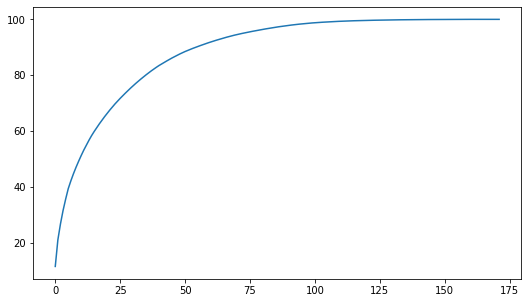

In [57]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [58]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [63]:

# fit model
pipeline.fit(X_trainNotNaN, y_trainNonDup)

# check score on train data
pipeline.score(X_trainNotNaN, y_trainNonDup)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.5391133373905717

In [64]:
y_test = y_test[:7143]

### Evaluate on test data

In [65]:
# predict churnDF on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3469 3090]
 [ 299  285]]
Sensitivity: 	0.49
Specificity: 	0.53
AUC:    	 0.51


### Hyperparameter tuning - PCA and Logistic Regression

In [66]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churnDF, dtype: float64

In [67]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [68]:
# fit model
model.fit(X_trainNotNaN, y_trainNonDup)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [69]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.212987,0.828870,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,6.412937,0.505919,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,5.443507,0.562414,0.161952,0.029991,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.501026,0.509730,0.494145,0.497995,0.505470,0.501673,0.005476,16
3,7.556919,0.358224,0.140807,0.030842,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.512803,0.507383,0.481305,0.507507,0.519512,0.505702,0.012980,4
4,4.849871,0.199495,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
5,6.633634,0.272525,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
6,6.063052,0.759265,0.180186,0.026164,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.499112,0.511167,0.495540,0.496658,0.508139,0.502123,0.006328,13
7,7.996062,0.417313,0.158815,0.022192,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.512594,0.508513,0.481628,0.506578,0.519081,0.505679,0.012765,5
8,5.577969,0.424762,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
9,7.462450,0.665488,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [70]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5065753420680172
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [71]:
# predict churnDF on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5689  870]
 [ 500   84]]
Sensitivity: 	0.14
Specificity: 	0.87
AUC:    	 0.5


### Random Forest

In [72]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [73]:
# fit model
model.fit(X_trainNotNaN, y_trainNonDup)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [74]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5237746160575215
Best hyperparameters:  {'criterion': 'gini', 'max_features': 0.4}


In [75]:
# predict churnDF on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6559    0]
 [ 584    0]]
Sensitivity: 	0.0
Specificity: 	1.0
AUC:    	 0.51


Poor sensitivity. The best model is PCA along with Logistic regression.

## ii) Choosing best features

In [76]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_trainNotNaN.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [77]:
# fit model
rf_model.fit(X_trainNotNaN, y_trainNonDup)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.7s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [78]:
# OOB score
rf_model.oob_score_

0.9185899536538552

In [79]:
# predict churnDF on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[6559    0]
 [ 584    0]]
Sensitivity: 	0.0
Specificity: 	1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 0.5


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


### Feature Importance

In [80]:
# predictors
features = churnDF_filtered.drop('churnDF', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,aon,1.314696
1,onnet_mou_diff,1.217656
2,loc_og_mou_diff,1.138791
3,arpu_7,1.120378
4,loc_ic_t2t_mou_7,1.106647
5,total_ic_mou_7,1.105632
6,std_ic_mou_diff,1.097226
7,offnet_mou_diff,1.084913
8,total_rech_amt_diff,1.084660
9,total_rech_amt_7,1.078689


### Extracting top 30 features

In [81]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

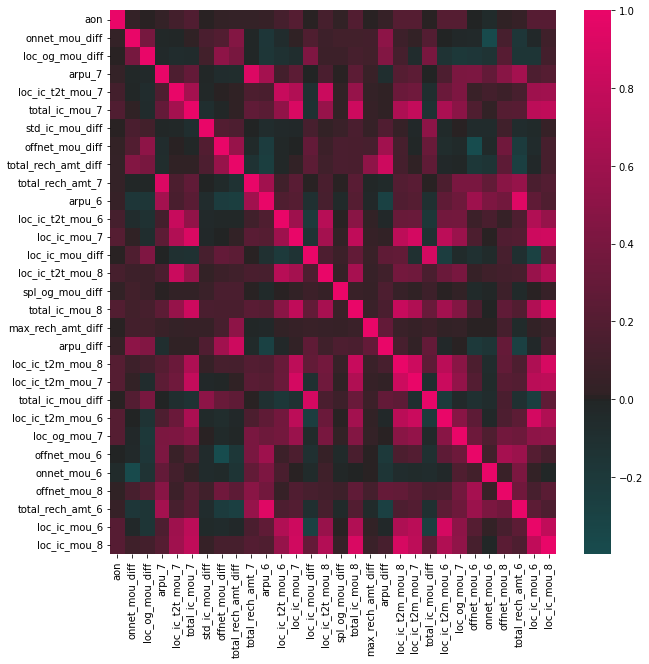

In [82]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="dark", as_cmap=True)
sns.heatmap(data=X_trainNotNaN[top_features].corr(), center=0.0, cmap=mycmap)

In [83]:
# top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
#                 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
# X_train = X_trainNotNaN[top_features]
# X_test = X_test[top_features]

In [84]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [85]:
# fit model
model.fit(X_trainNotNaN, y_trainNonDup)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [86]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5103957987052692
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [87]:
# predict churnDF on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5573  986]
 [ 498   86]]
Sensitivity: 	0.15
Specificity: 	0.85
ROC:    	 0.5


### Extract the intercept and the coeff from the logistic model 

In [88]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [89]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [90]:
# coeff
coeff = logistic_model.coef_.tolist()
# coeff = logistic_model.coef_.reshape((9, 1)).tolist()
coeff = [val for sublist in coeff for val in sublist]
coeff = [round(coefficient, 3) for coefficient in coeff]

logistic_features = list(X_trainNotNaN.columns)
coeff_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [91]:
# concatenate dataframes
coeff = pd.concat([intercept_df, coeff_df], axis=1)
coeff

,intercept,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,-0.267075,0.0,0.0,0.0,0.073143,-0.045355,0.084938,-0.052689,-0.024684,0.060059,-0.17811,-0.005181,-0.095184,0.069177,0.128343,-0.136739,-0.026108,-0.010433,0.043587,-0.063395,-0.013284,-0.131809,0.017714,0.067451,-0.122508,0.056191,0.027069,-0.094476,-0.057967,0.017965,0.032962,0.032365,0.076525,0.177987,0.014873,-0.022027,0.089121,0.082225,0.228428,0.06696,0.004468,0.013462,0.0334,0.0,0.0,0.0,-0.055514,-0.068101,-0.088017,-0.00325,0.006998,-0.034438,0.035549,0.083518,-0.097373,0.004607,-0.022267,-0.011585,-0.033539,0.04996,0.056539,-0.095726,0.066939,-0.030214,-0.042007,-0.024757,-0.024674,0.017347,-0.002785,-0.019365,-0.079654,-0.082765,0.12359,0.044153,-0.065704,-0.051327,-0.034177,-0.032689,-0.040429,-0.055588,0.021508,-0.007933,0.0,0.0,0.0,0.058011,0.008807,-0.042118,0.064279,0.184669,0.01755,0.05172,0.041694,-0.089509,-0.084365,-0.094572,0.131933,-0.028559,0.002871,-0.014577,0.086061,-0.007477,-0.15262,-0.040772,-0.105618,0.068913,0.02366,-0.02527,-0.066166,-0.054411,0.000776,-0.008101,0.00695,0.120338,-0.062909,-0.090855,-0.040456,-0.002985,-0.059663,0.01729,0.054214,0.028383,0.089568,-0.038354,0.022298,0.168213,-0.139005,-0.119758,0.045068,-0.026234,0.027373,-0.05025,0.047021,0.036668,-0.003905,-0.034998,0.066791,-0.015906,0.075531,0.032958,-0.016662,0.024106,0.092282,0.047104,0.088749,0.001606,0.005276,-0.049922,0.051026,0.023289,-0.150477,0.003774,0.050321,0.163103,-0.033501,-0.025973,-0

## Insights

* Call Rates are high for STD and ISD. Consoliated packages can be recommended
* Roming Rates can be slashed to attract more customer